In [ ]:
# !pip install seaborn
# !pip install scipy
# !pip install scikit-learn
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize

In [ ]:
train_values = pd.read_csv('/content/train_values.csv')
train_labels = pd.read_csv('/content/train_labels.csv')
test_values = pd.read_csv('/content/test_values.csv')
test_labels = pd.read_csv('/content/submission.csv')

In [ ]:
print("# Train Values: {}".format(train_values.shape))
print("# Train Labels: {}".format(train_labels.shape))
print("# Test Values: {}".format(test_values.shape))
print("# Test Labels: {}".format(test_labels.shape))

# Train Values: (260601, 39)
# Train Labels: (260601, 2)
# Test Values: (86868, 39)
# Test Labels: (86868, 2)


# data type


In [ ]:
train_values.dtypes

building_id                                int64
geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_c

In [ ]:
train_labels.dtypes

building_id     int64
damage_grade    int64
dtype: object

In [ ]:
test_values.dtypes

building_id                                int64
geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_c

In [ ]:
test_labels.dtypes

building_id     int64
damage_grade    int64
dtype: object

In [ ]:
train_values.isnull().sum() * 100 / len(train_values)

building_id                               0.0
geo_level_1_id                            0.0
geo_level_2_id                            0.0
geo_level_3_id                            0.0
count_floors_pre_eq                       0.0
age                                       0.0
area_percentage                           0.0
height_percentage                         0.0
land_surface_condition                    0.0
foundation_type                           0.0
roof_type                                 0.0
ground_floor_type                         0.0
other_floor_type                          0.0
position                                  0.0
plan_configuration                        0.0
has_superstructure_adobe_mud              0.0
has_superstructure_mud_mortar_stone       0.0
has_superstructure_stone_flag             0.0
has_superstructure_cement_mortar_stone    0.0
has_superstructure_mud_mortar_brick       0.0
has_superstructure_cement_mortar_brick    0.0
has_superstructure_timber         

In [ ]:
train_labels.isnull().sum() * 100 / len(train_values)

building_id     0.0
damage_grade    0.0
dtype: float64

In [ ]:
test_values.isnull().sum() * 100 / len(train_values)

building_id                               0.0
geo_level_1_id                            0.0
geo_level_2_id                            0.0
geo_level_3_id                            0.0
count_floors_pre_eq                       0.0
age                                       0.0
area_percentage                           0.0
height_percentage                         0.0
land_surface_condition                    0.0
foundation_type                           0.0
roof_type                                 0.0
ground_floor_type                         0.0
other_floor_type                          0.0
position                                  0.0
plan_configuration                        0.0
has_superstructure_adobe_mud              0.0
has_superstructure_mud_mortar_stone       0.0
has_superstructure_stone_flag             0.0
has_superstructure_cement_mortar_stone    0.0
has_superstructure_mud_mortar_brick       0.0
has_superstructure_cement_mortar_brick    0.0
has_superstructure_timber         

In [ ]:
test_labels.isnull().sum() * 100 / len(test_labels)

building_id     0.0
damage_grade    0.0
dtype: float64

In [ ]:
train_values.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
column_titles = train_values.columns
column_titles

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

In [ ]:
train_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [ ]:
train_values.describe()
# for num values

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,...,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,...,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#add damage_grade to train_values
train_values['damage_grade'] = train_labels["damage_grade"]
test_values['damage_grade'] = test_labels["damage_grade"]

In [ ]:
train_values["damage_grade"].value_counts()

damage_grade
2    148259
3     87218
1     25124
Name: count, dtype: int64

In [ ]:
train_values["damage_grade"].describe()

count    260601.000000
mean          2.238272
std           0.611814
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           3.000000
Name: damage_grade, dtype: float64

# Data Distribution

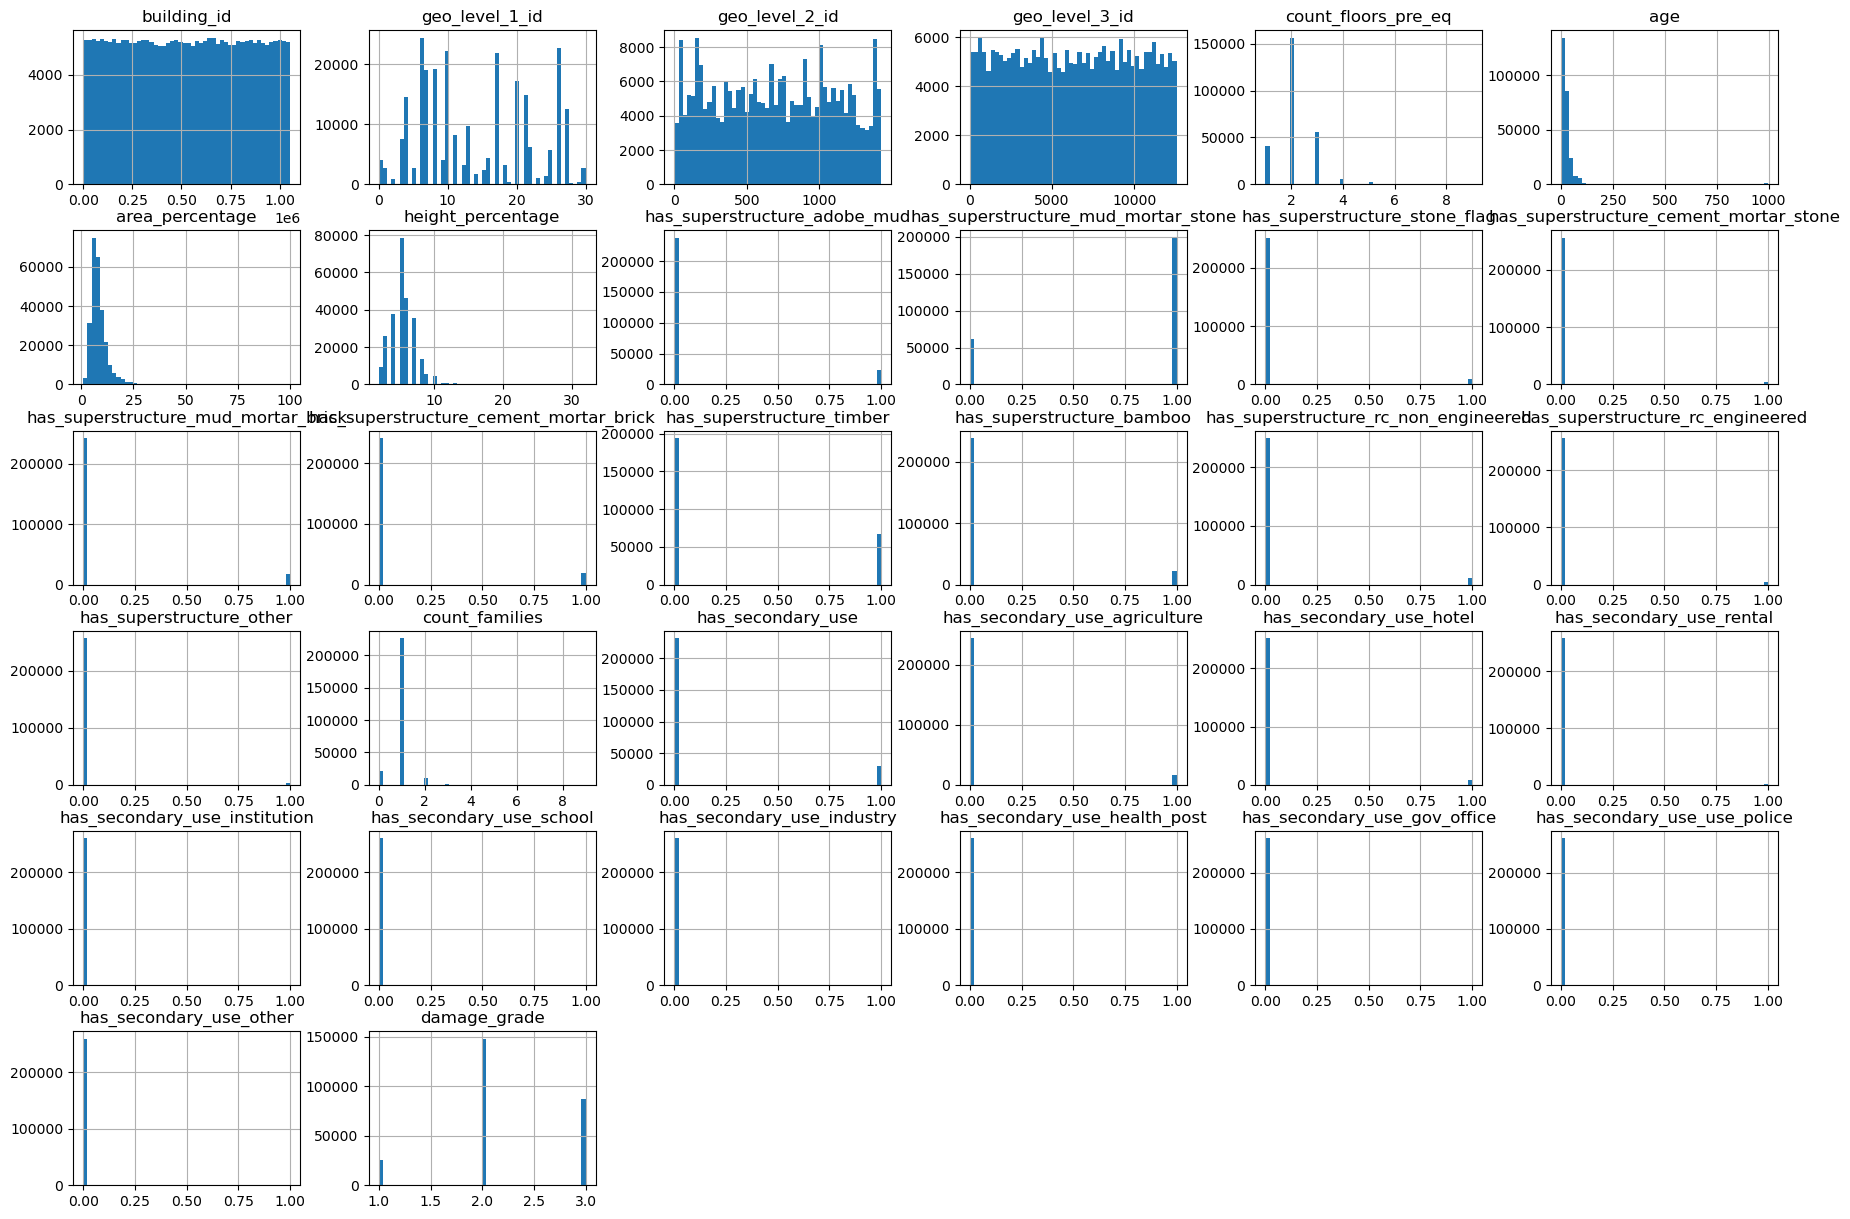

In [ ]:
#to plot CVD Dataset as histogram : .hist() / just for numerical value
train_values.hist(bins=50, figsize=(22,15))
plt.show()

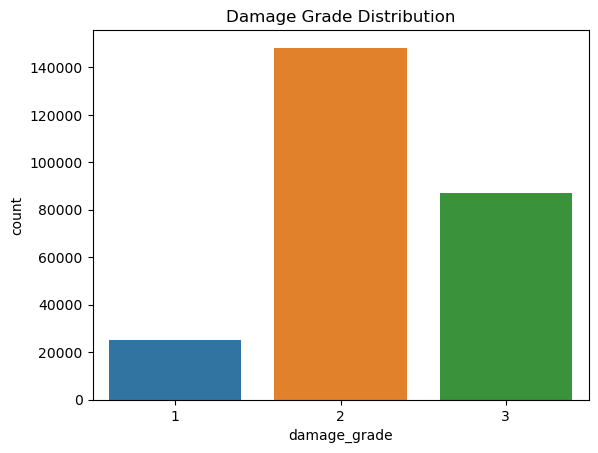

In [ ]:
sns.countplot(x="damage_grade", data=train_labels)
plt.title("Damage Grade Distribution")
plt.show()

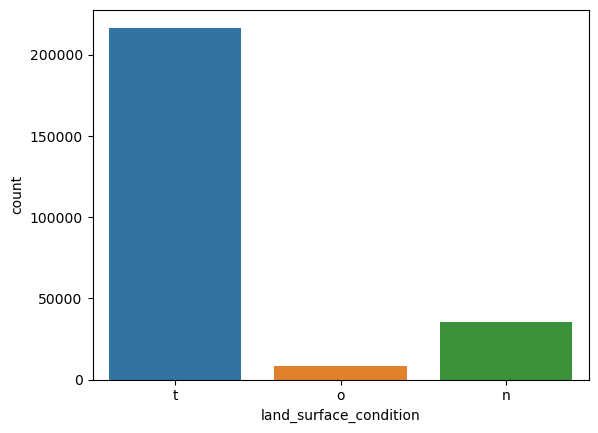

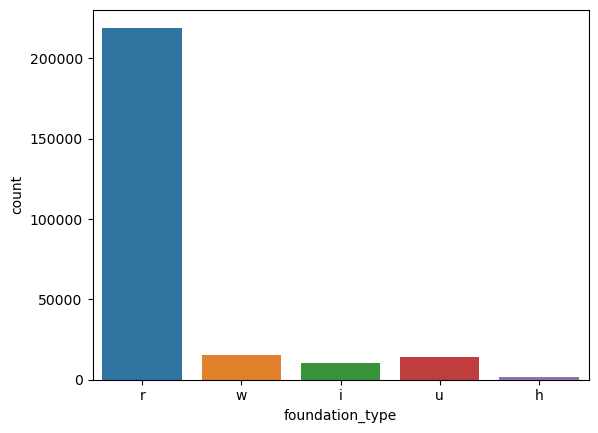

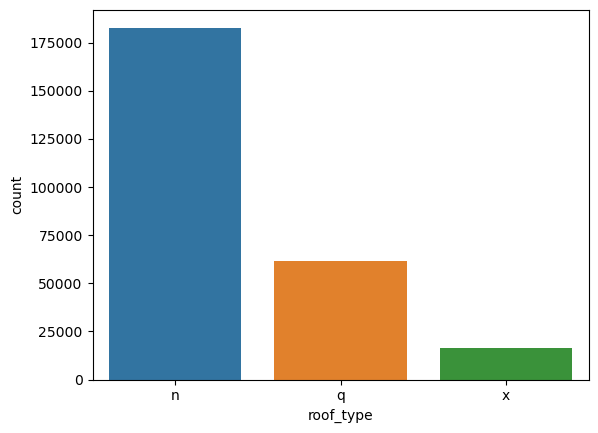

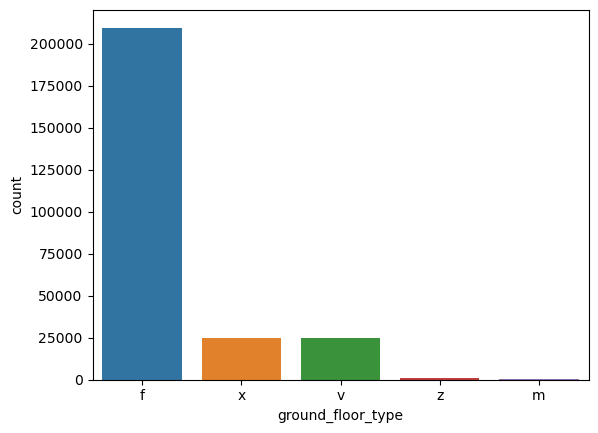

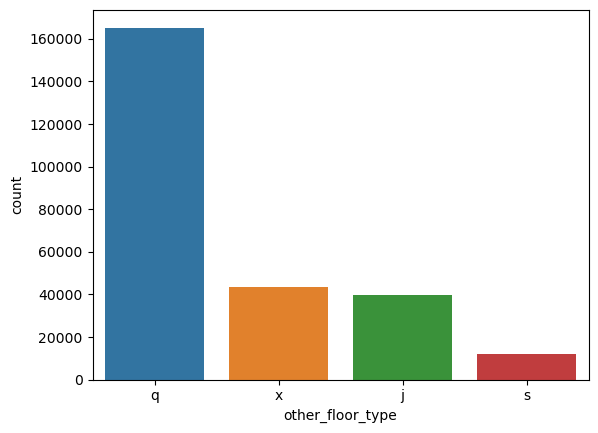

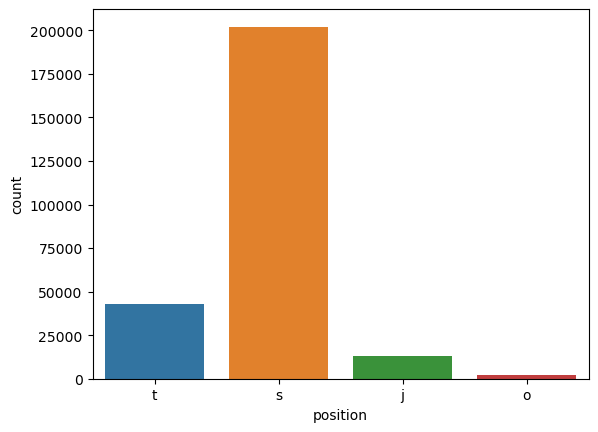

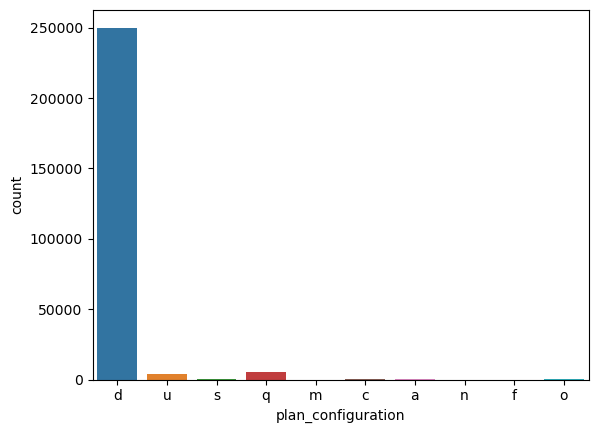

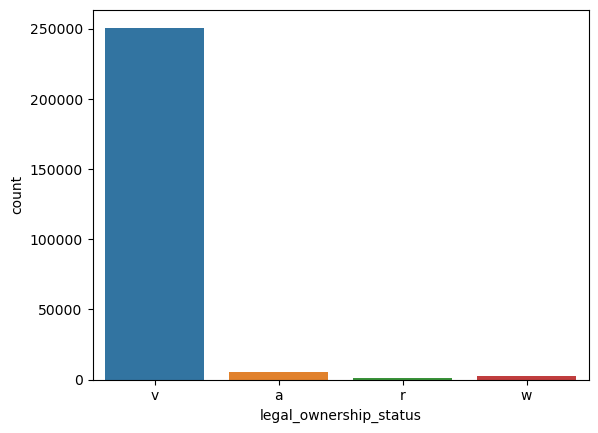

In [ ]:
train_valuesobj = train_values.select_dtypes(include='object')

for N in train_valuesobj.iloc[:,:].columns:
    ax=sns.countplot(x=N, data=train_valuesobj)
    plt.show()

<Figure size 2000x1000 with 0 Axes>

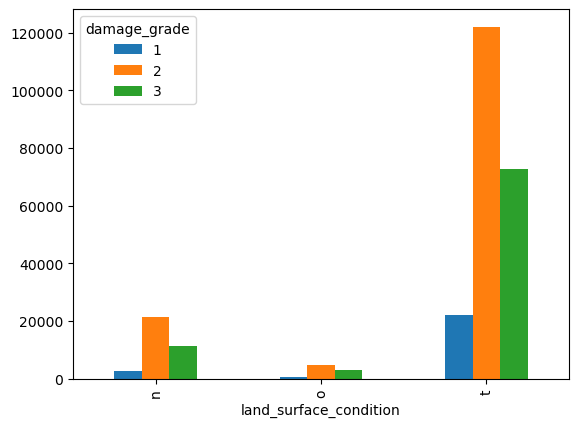

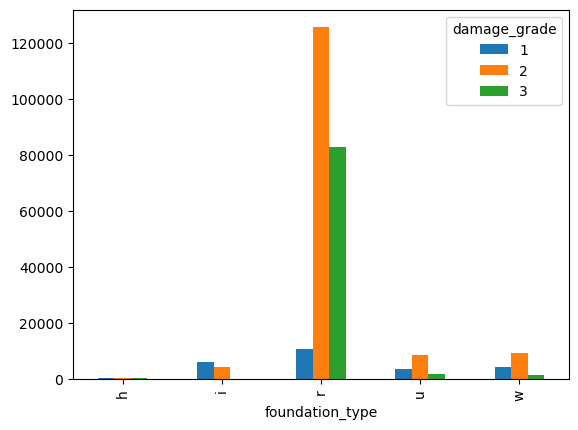

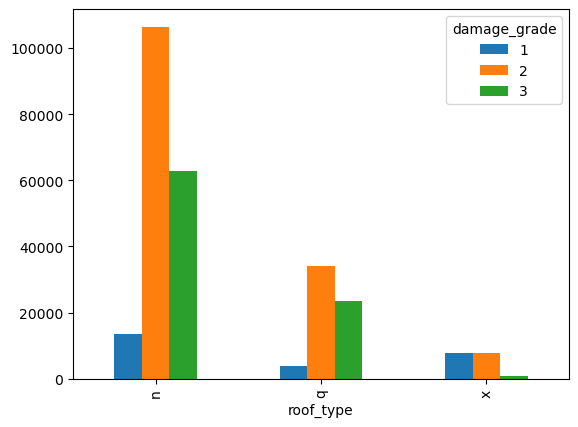

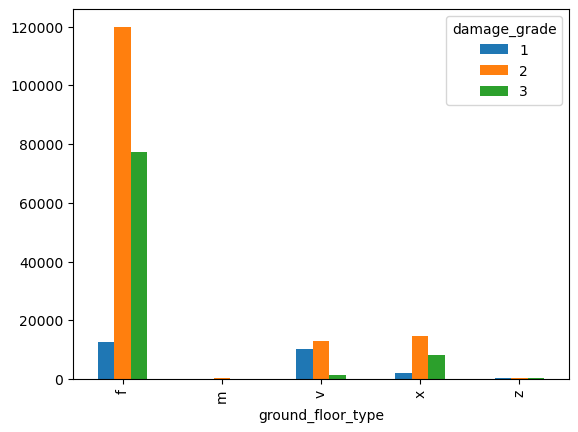

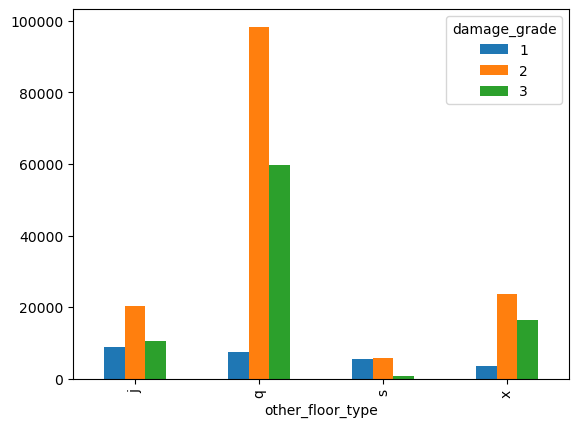

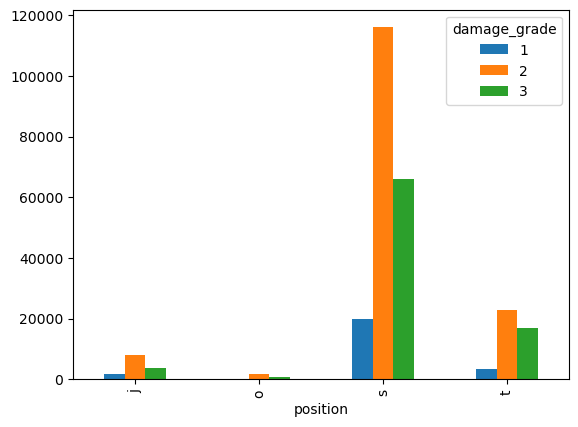

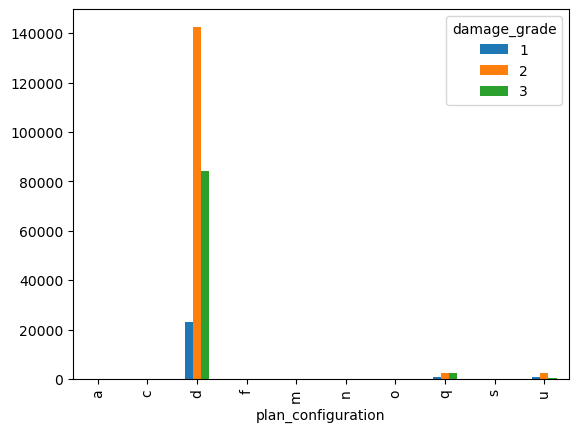

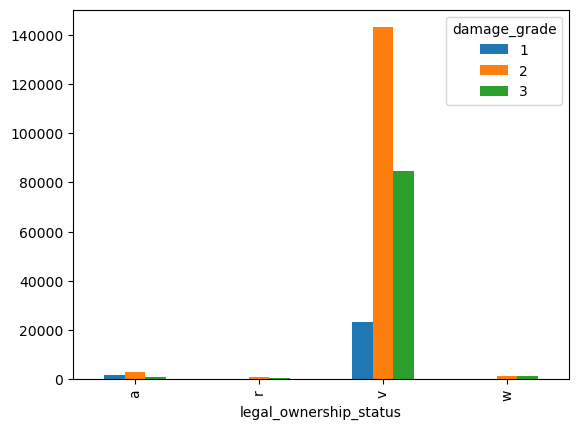

In [ ]:
#show how each cat_features affect on damage_grade
plt.figure(figsize=(20,10))
for i, col in enumerate(train_valuesobj):
    pd.crosstab(index=train_values[col], columns=train_values['damage_grade']).plot(kind='bar')

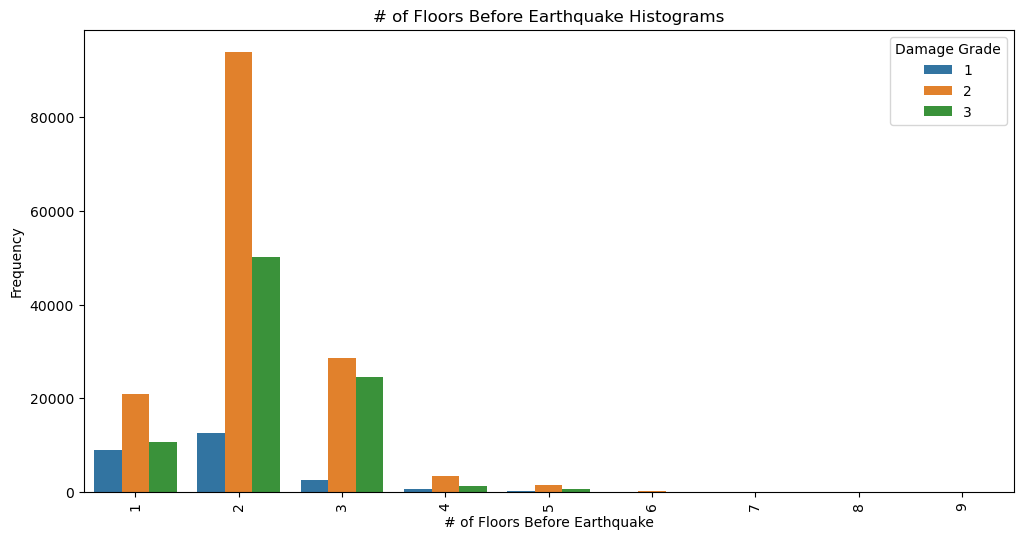

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x=train_values["count_floors_pre_eq"], hue=train_labels["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("# of Floors Before Earthquake")
plt.xticks(rotation=90)
plt.title("# of Floors Before Earthquake Histograms")
plt.legend(title="Damage Grade", labels=["1", "2", "3"])
plt.show()

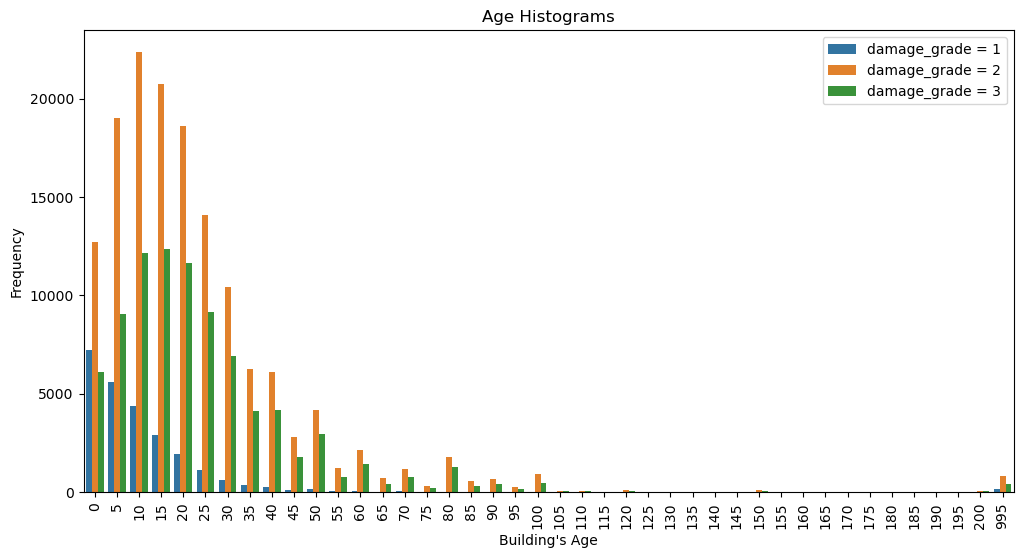

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x=train_values["age"],hue=train_labels["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("Building's Age")
plt.xticks(rotation=90)
plt.title("Age Histograms")
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show()

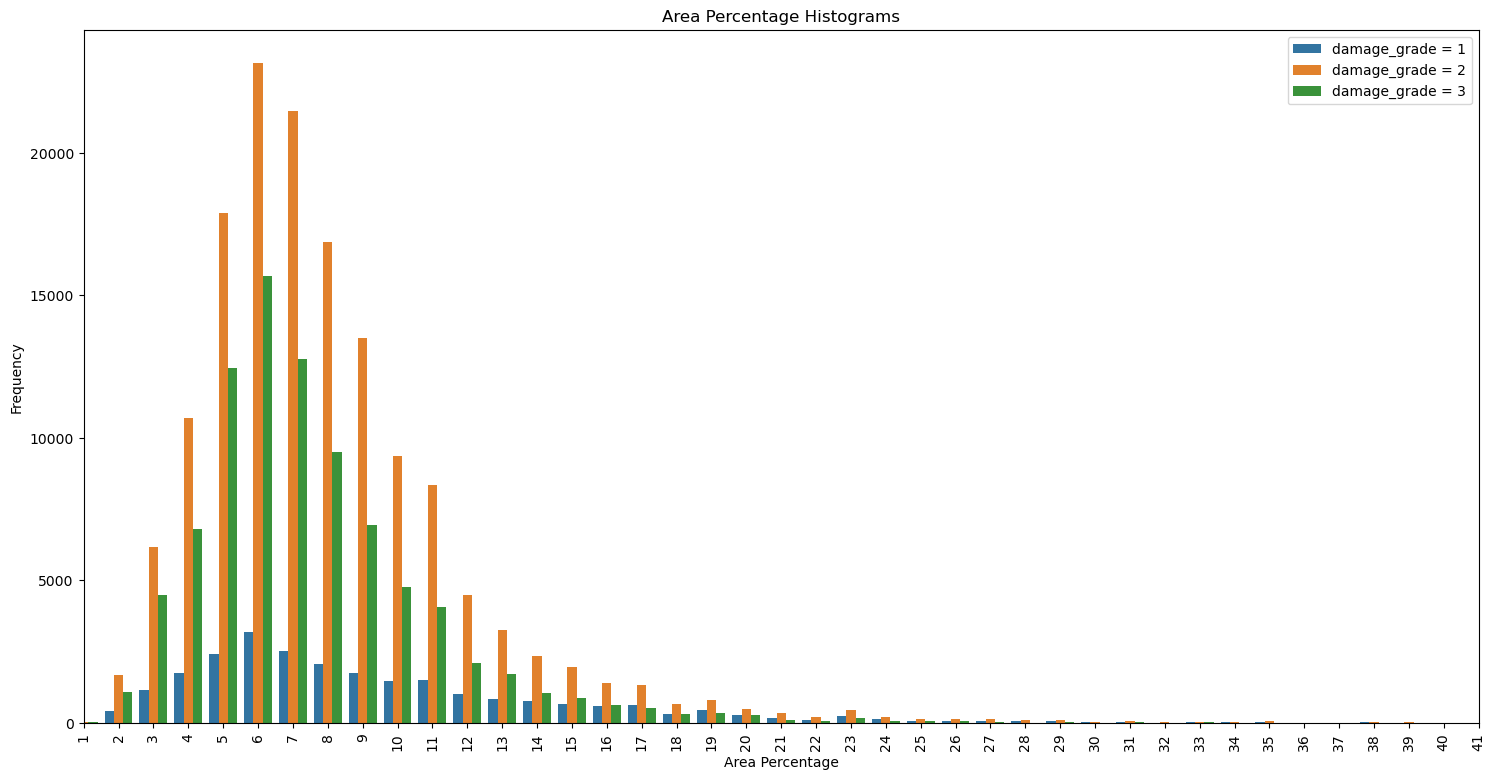

In [ ]:
plt.figure(figsize=(18,9))
sns.countplot(x=train_values["area_percentage"],hue=train_labels["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("Area Percentage")
plt.xticks(rotation=90)
plt.title("Area Percentage Histograms")
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.xlim(0, 40)
plt.show()

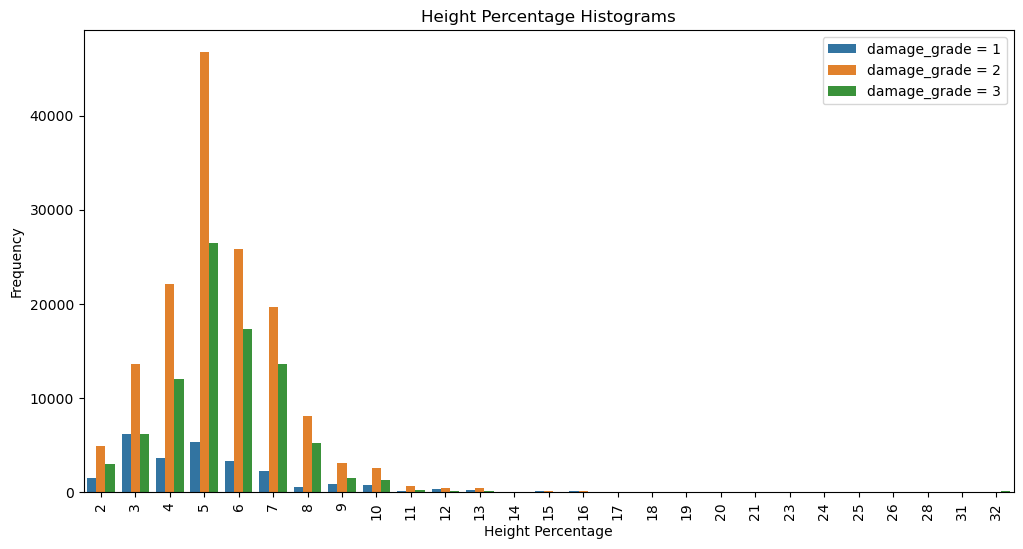

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x=train_values["height_percentage"],hue=train_labels["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("Height Percentage")
plt.xticks(rotation=90)
plt.title("Height Percentage Histograms")
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show()

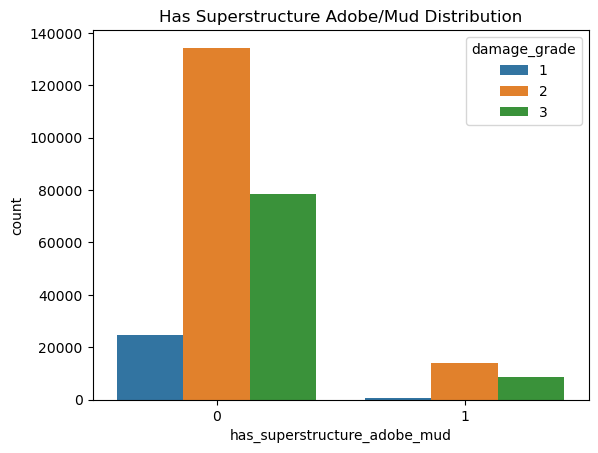

In [ ]:
sns.countplot(x = train_values["has_superstructure_adobe_mud"], hue = train_labels["damage_grade"])
plt.title("Has Superstructure Adobe/Mud Distribution")
plt.show()

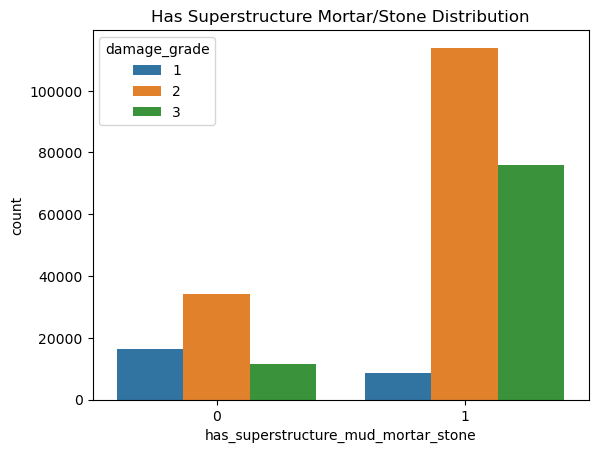

In [ ]:
sns.countplot(x = train_values["has_superstructure_mud_mortar_stone"], hue = train_labels["damage_grade"])
plt.title("Has Superstructure Mortar/Stone Distribution")
plt.show()

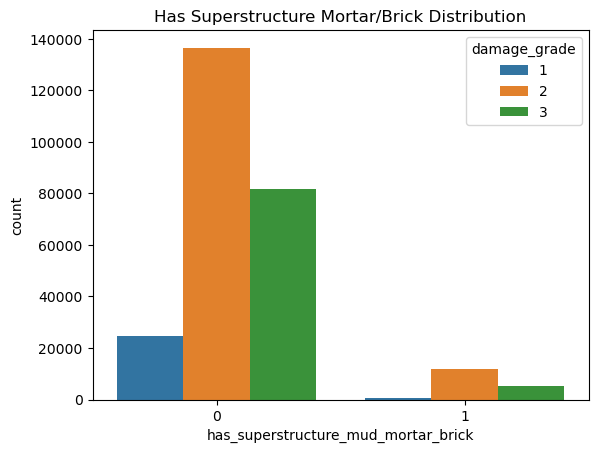

In [ ]:
sns.countplot(x = train_values["has_superstructure_mud_mortar_brick"], hue = train_labels["damage_grade"])
plt.title("Has Superstructure Mortar/Brick Distribution")
plt.show()

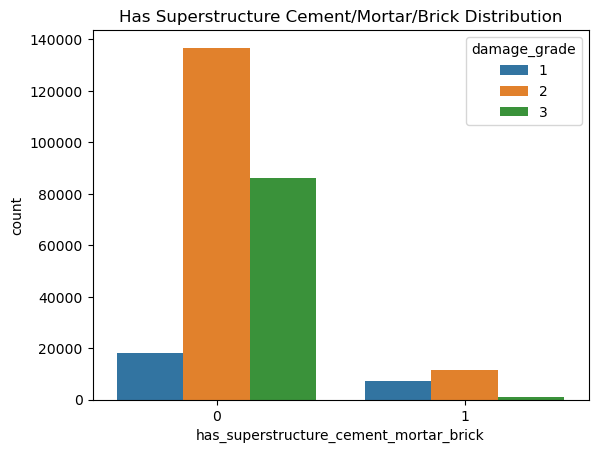

In [ ]:
sns.countplot(x = train_values["has_superstructure_cement_mortar_brick"], hue = train_labels["damage_grade"])
plt.title("Has Superstructure Cement/Mortar/Brick Distribution")
plt.show()

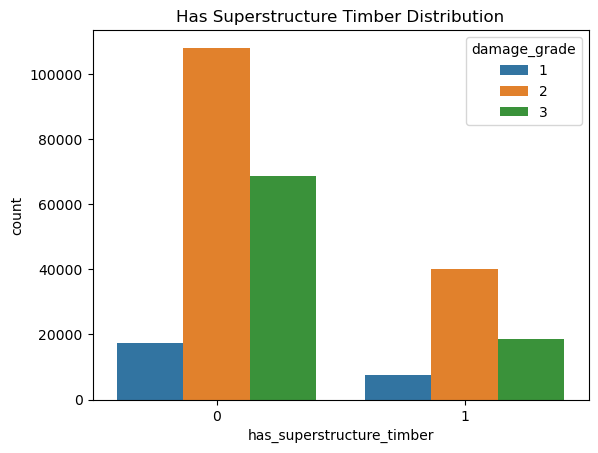

In [ ]:
sns.countplot(x = train_values["has_superstructure_timber"], hue = train_labels["damage_grade"])
plt.title("Has Superstructure Timber Distribution")
plt.show()

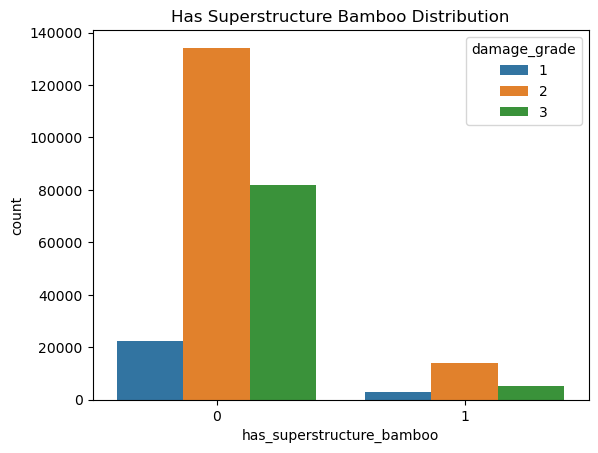

In [ ]:
sns.countplot(x = train_values["has_superstructure_bamboo"], hue = train_labels["damage_grade"])
plt.title("Has Superstructure Bamboo Distribution")
plt.show()

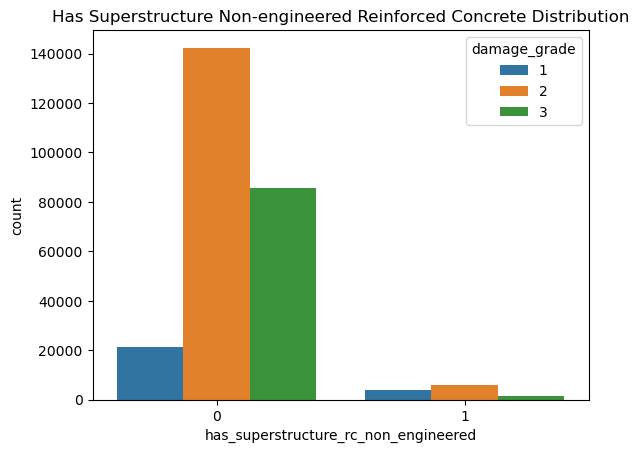

In [ ]:
sns.countplot(x = train_values["has_superstructure_rc_non_engineered"], hue = train_labels["damage_grade"])
plt.title("Has Superstructure Non-engineered Reinforced Concrete Distribution")
plt.show()

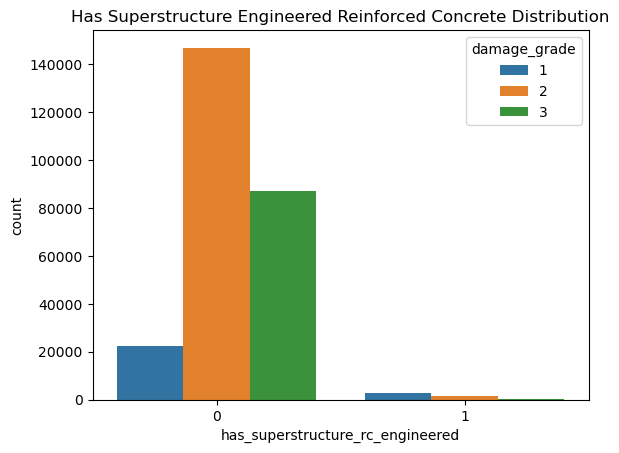

In [ ]:
sns.countplot(x = train_values["has_superstructure_rc_engineered"], hue = train_labels["damage_grade"])
plt.title("Has Superstructure Engineered Reinforced Concrete Distribution")
plt.show()

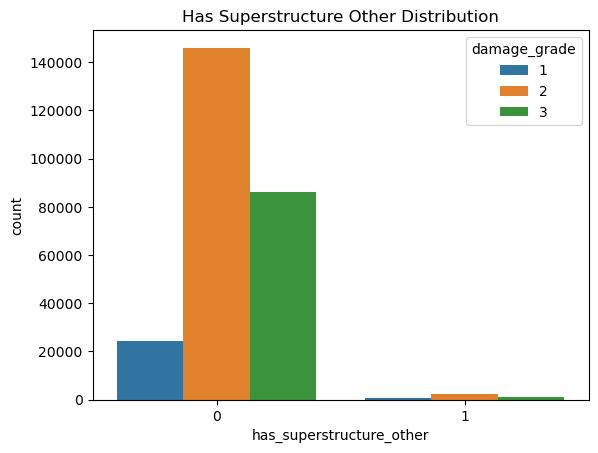

In [ ]:
sns.countplot(x = train_values["has_superstructure_other"], hue = train_labels["damage_grade"])
plt.title("Has Superstructure Other Distribution")
plt.show()

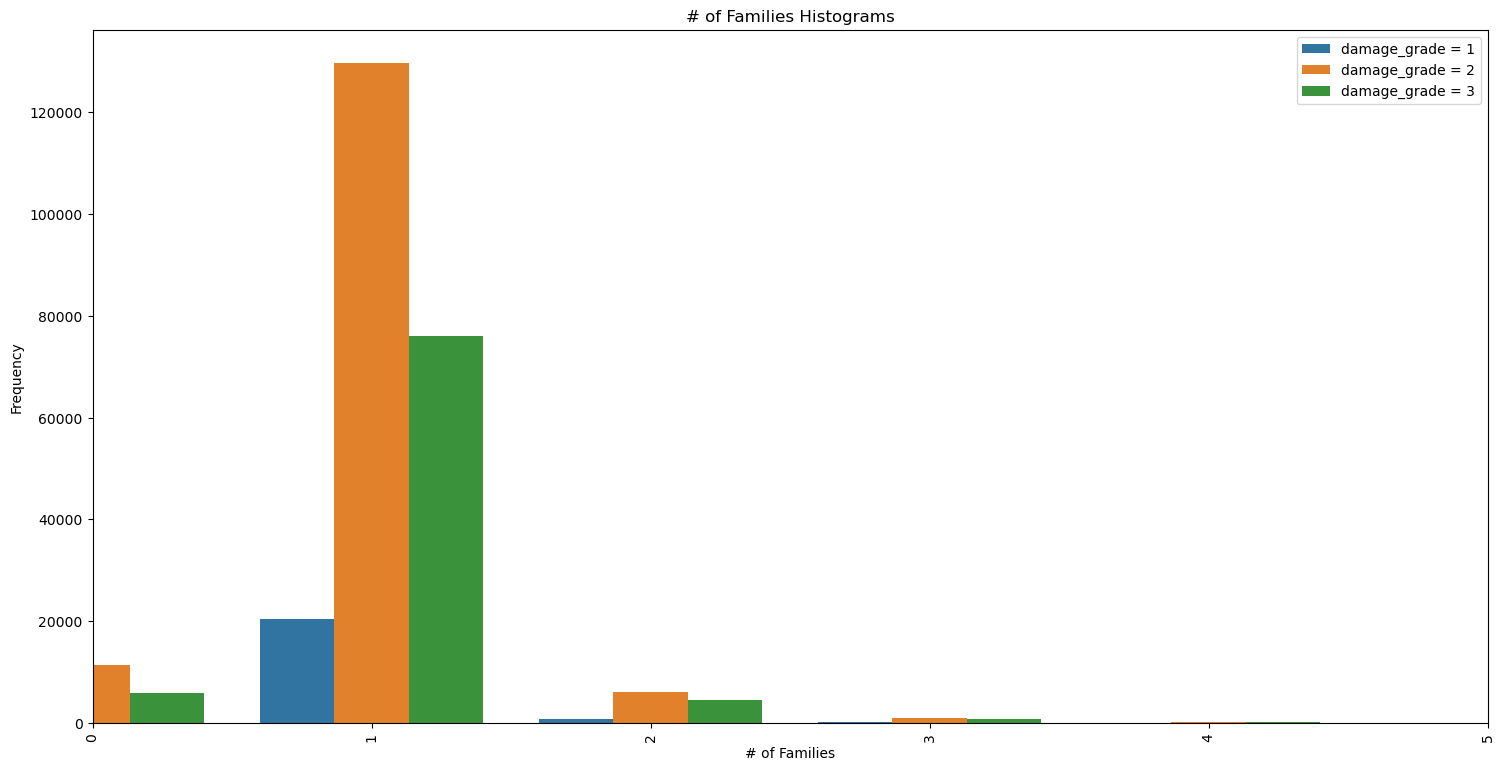

In [ ]:
plt.figure(figsize=(18,9))
sns.countplot(x=train_values["count_families"],hue=train_labels["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("# of Families")
plt.xticks(rotation=90)
plt.title("# of Families Histograms")
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.xlim(0,5)
plt.show()

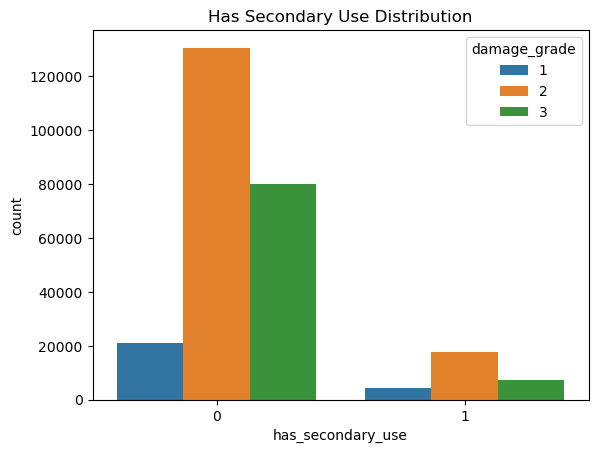

In [ ]:
sns.countplot(x = train_values["has_secondary_use"], hue = train_labels["damage_grade"])
plt.title("Has Secondary Use Distribution")
plt.show()

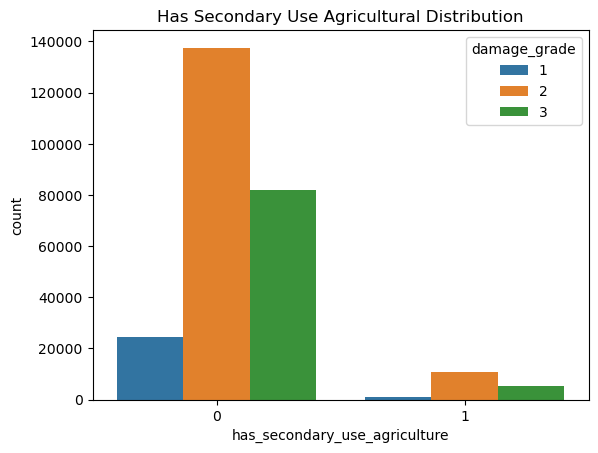

In [ ]:
sns.countplot(x = train_values["has_secondary_use_agriculture"], hue = train_labels["damage_grade"])
plt.title("Has Secondary Use Agricultural Distribution")
plt.show()

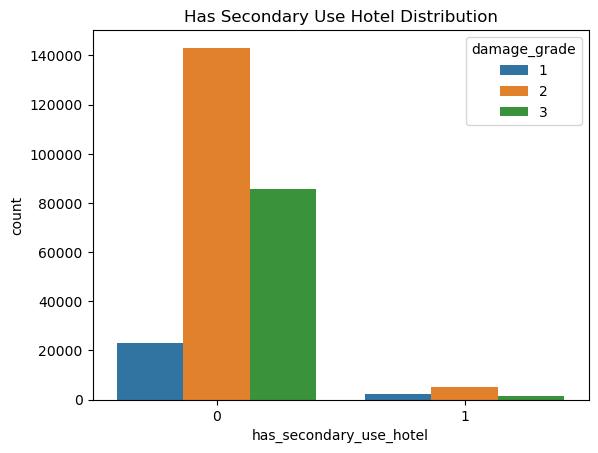

In [ ]:
sns.countplot(x = train_values["has_secondary_use_hotel"], hue = train_labels["damage_grade"])
plt.title("Has Secondary Use Hotel Distribution")
plt.show()

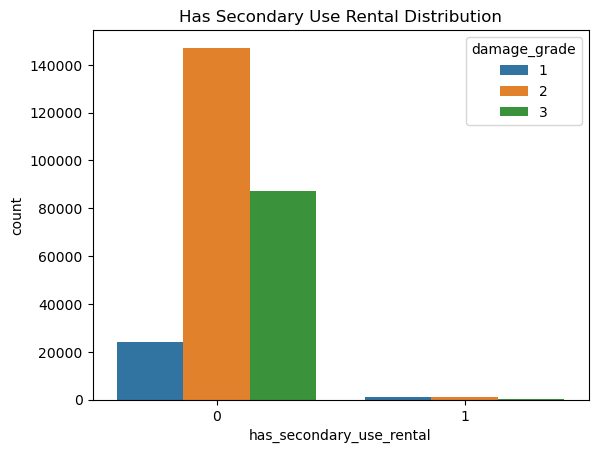

In [ ]:
sns.countplot(x = train_values["has_secondary_use_rental"], hue = train_labels["damage_grade"])
plt.title("Has Secondary Use Rental Distribution")
plt.show()

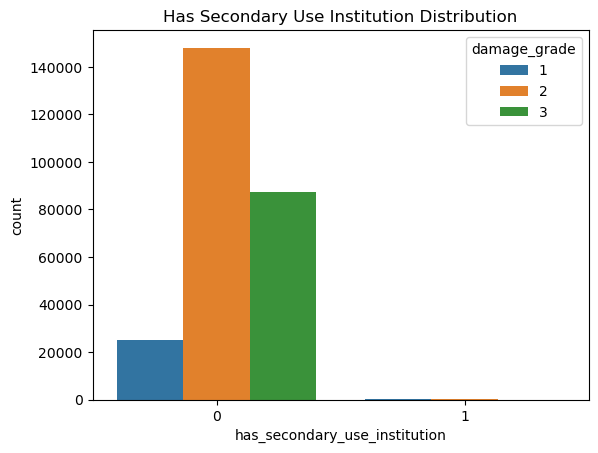

In [ ]:
sns.countplot(x = train_values["has_secondary_use_institution"], hue = train_labels["damage_grade"])
plt.title("Has Secondary Use Institution Distribution")
plt.show()

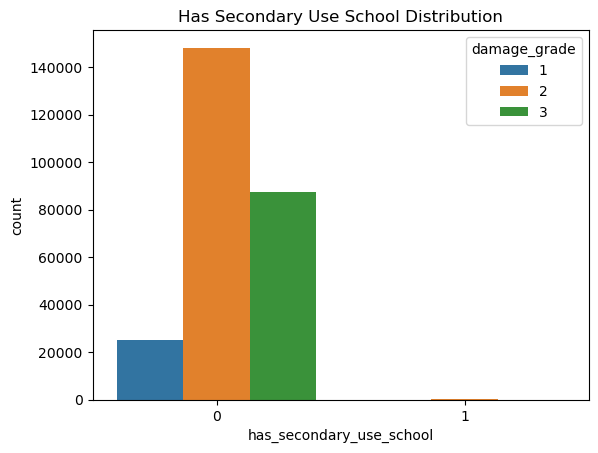

In [ ]:
sns.countplot(x = train_values["has_secondary_use_school"], hue = train_labels["damage_grade"])
plt.title("Has Secondary Use School Distribution")
plt.show()

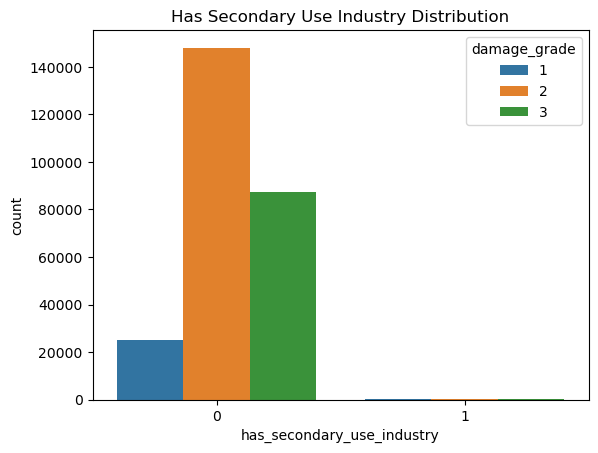

In [ ]:
sns.countplot(x = train_values["has_secondary_use_industry"], hue = train_labels["damage_grade"])
plt.title("Has Secondary Use Industry Distribution")
plt.show()

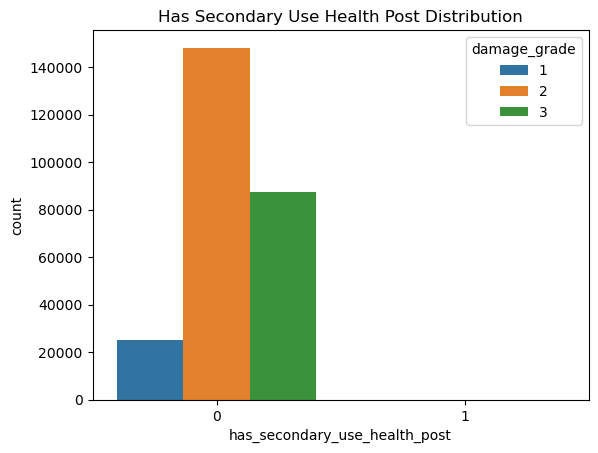

In [ ]:
sns.countplot(x = train_values["has_secondary_use_health_post"], hue = train_labels["damage_grade"])
plt.title("Has Secondary Use Health Post Distribution")
plt.show()

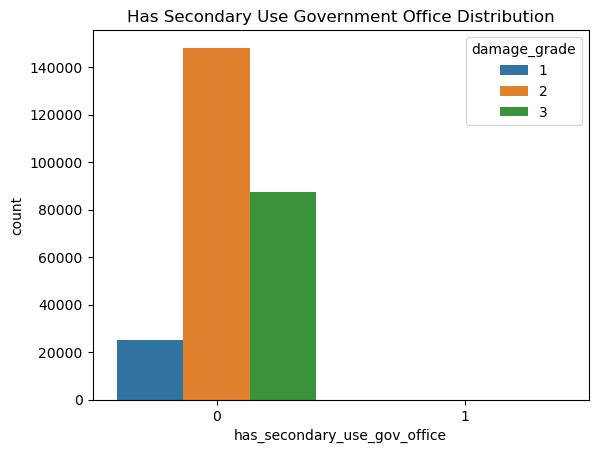

In [ ]:
sns.countplot(x = train_values["has_secondary_use_gov_office"], hue = train_labels["damage_grade"])
plt.title("Has Secondary Use Government Office Distribution")
plt.show()

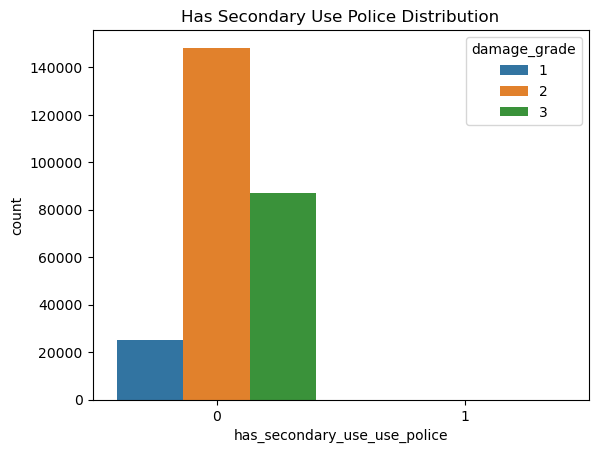

In [ ]:
sns.countplot(x = train_values["has_secondary_use_use_police"], hue = train_labels["damage_grade"])
plt.title("Has Secondary Use Police Distribution")
plt.show()

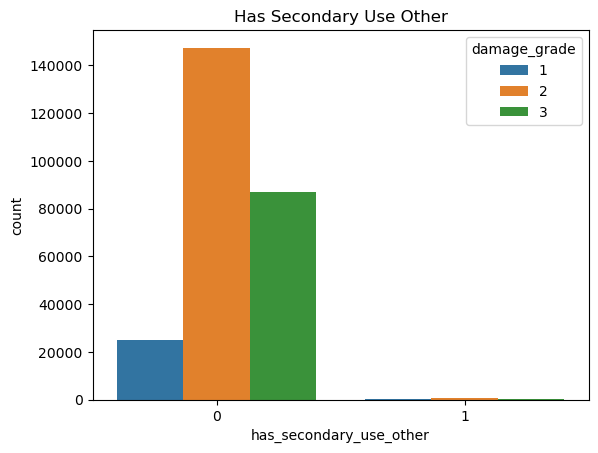

In [ ]:
sns.countplot(x = train_values["has_secondary_use_other"], hue = train_labels["damage_grade"])
plt.title("Has Secondary Use Other")
plt.show()

**Outliers**

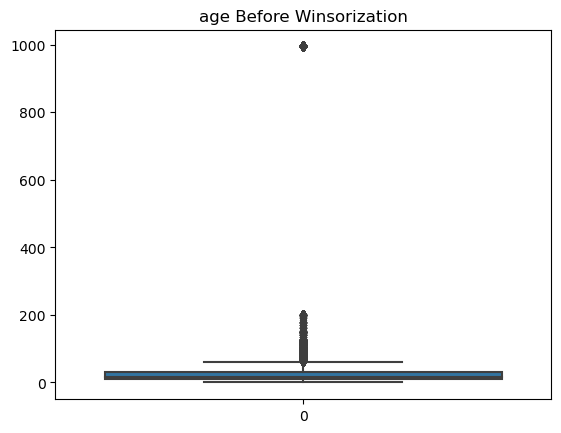

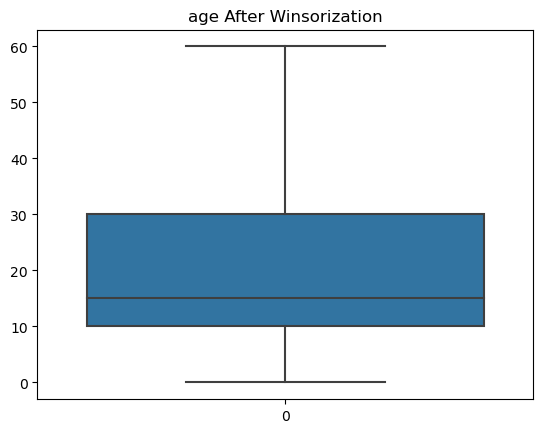

In [ ]:
#Data source
name = "age"
data = train_values[name]

#Before winsorization
sns.boxplot(data)
plt.title("{} Before Winsorization".format(name))
plt.show()

#Winsorization
winsorized_data = winsorize(data,(0, 0.05))

#After winsorization
sns.boxplot(winsorized_data)
plt.title("{} After Winsorization".format(name))
plt.show()

#Replace data in dataset
train_values[name] = winsorized_data

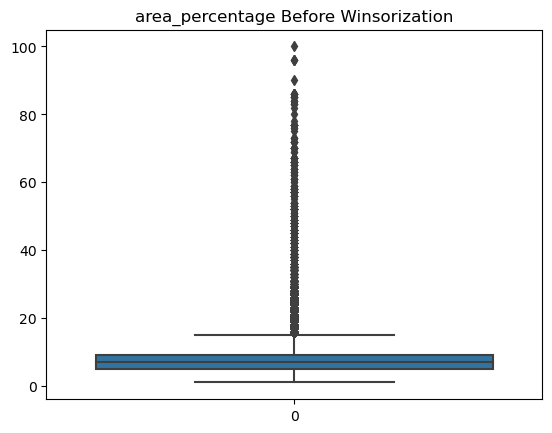

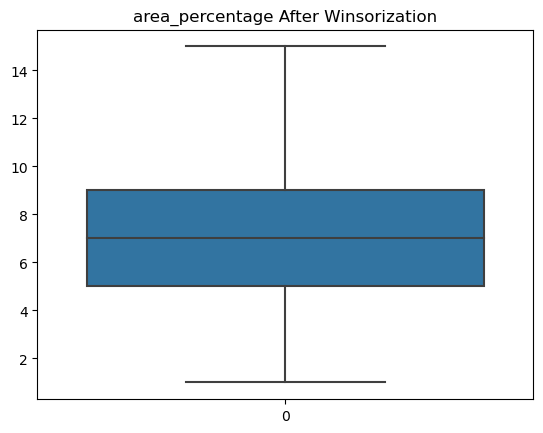

In [ ]:
#Data source
name = "area_percentage"
data = train_values[name]

#Before winsorization
sns.boxplot(data)
plt.title("{} Before Winsorization".format(name))
plt.show()

#Winsorization
winsorized_data = winsorize(data,(0, 0.055))

#After winsorization
sns.boxplot(winsorized_data)
plt.title("{} After Winsorization".format(name))
plt.show()

#Replace data in dataset
train_values[name] = winsorized_data

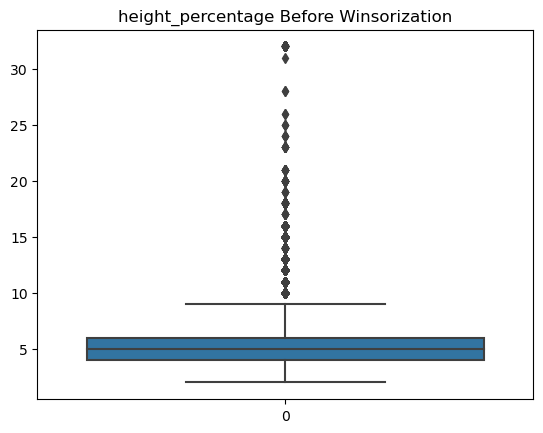

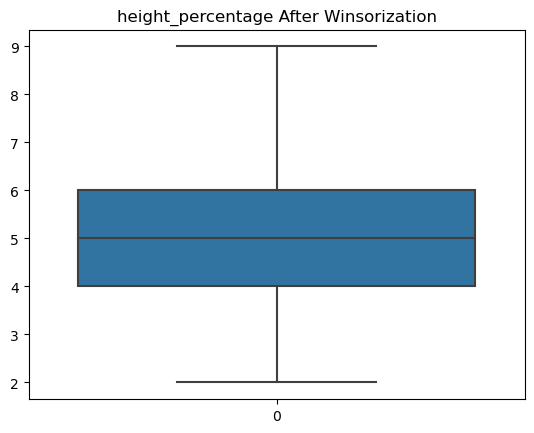

In [ ]:
#Data source
name = "height_percentage"
data = train_values[name]

#Before winsorization
sns.boxplot(data)
plt.title("{} Before Winsorization".format(name))
plt.show()

#Winsorization
winsorized_data = winsorize(data,(0, 0.04))

#After winsorization
sns.boxplot(winsorized_data)
plt.title("{} After Winsorization".format(name))
plt.show()

# Replace data in dataset
train_values[name] = winsorized_data

# Correlations


In [ ]:
buildingId_train = train_values["building_id"].copy()
train_values.drop(columns=["building_id"], inplace=True)
train_labels.drop(columns=["building_id"], inplace=True)
test_values.drop(columns=["building_id"], inplace=True)
test_labels.drop(columns=["building_id"], inplace=True)

In [ ]:
train_values_new = pd.get_dummies(train_values, drop_first = True)
test_values_new = pd.get_dummies(test_values, drop_first = True)

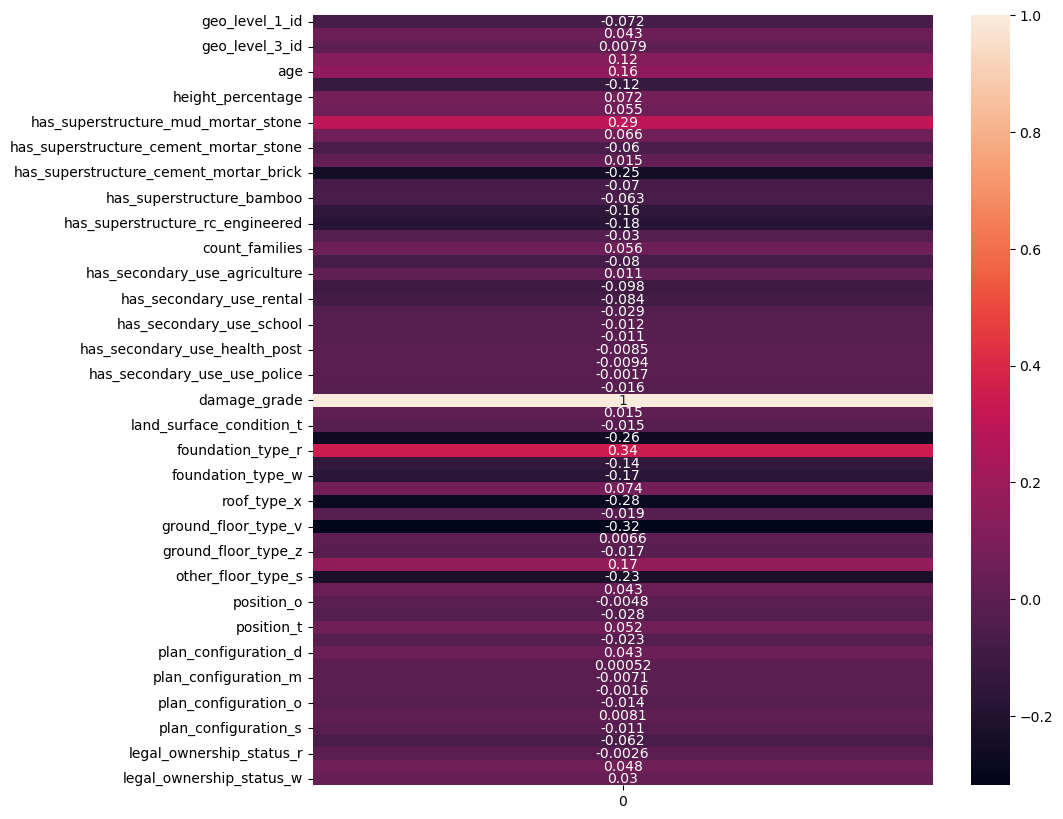

In [ ]:
plt.figure(figsize=(10,10))
correlations = train_values_new.corrwith(train_labels["damage_grade"])
sns.heatmap(pd.DataFrame(correlations), annot=True)
plt.show()

In [ ]:
train_values['damage_grade'] = train_labels["damage_grade"]

In [ ]:
corr_matrix = train_values.select_dtypes(include=[np.number]).corr()

In [ ]:
corr_matrix["damage_grade"].sort_values(ascending=False)

damage_grade                              1.000000
has_superstructure_mud_mortar_stone       0.291325
age                                       0.163126
count_floors_pre_eq                       0.122308
height_percentage                         0.071615
has_superstructure_stone_flag             0.066039
count_families                            0.056151
has_superstructure_adobe_mud              0.055314
geo_level_2_id                            0.043161
has_superstructure_mud_mortar_brick       0.014561
has_secondary_use_agriculture             0.011309
geo_level_3_id                            0.007932
has_secondary_use_use_police             -0.001656
has_secondary_use_health_post            -0.008543
has_secondary_use_gov_office             -0.009378
has_secondary_use_industry               -0.011024
has_secondary_use_school                 -0.011692
has_secondary_use_other                  -0.016334
has_secondary_use_institution            -0.028728
has_superstructure_other       

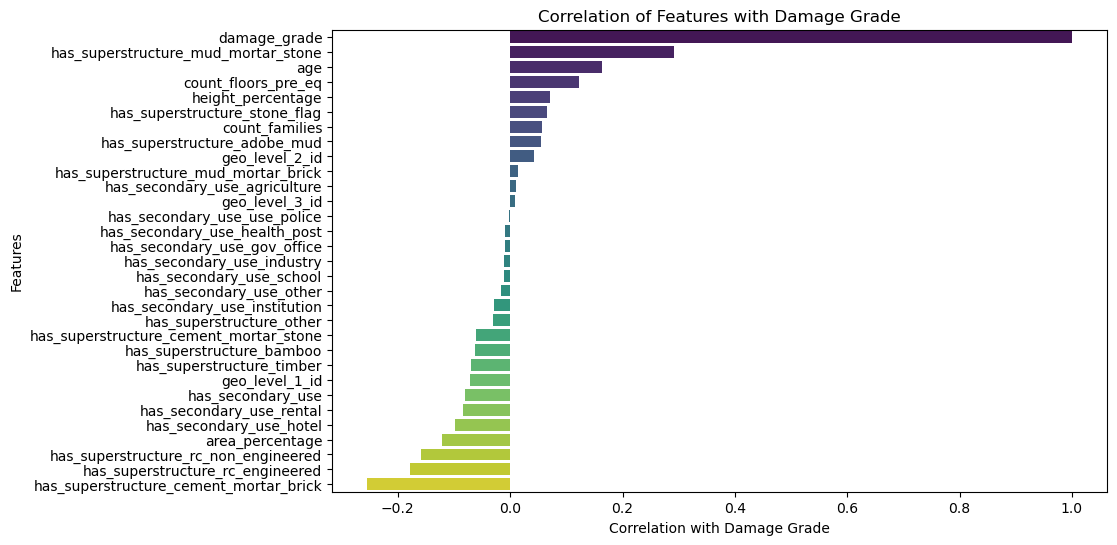

In [ ]:
sorted_correlations = corr_matrix["damage_grade"].sort_values(ascending=False)

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot
sns.barplot(x=sorted_correlations.values, y=sorted_correlations.index, palette="viridis")

# Set labels and title
plt.xlabel("Correlation with Damage Grade")
plt.ylabel("Features")
plt.title("Correlation of Features with Damage Grade")

# Show the plot
plt.show()

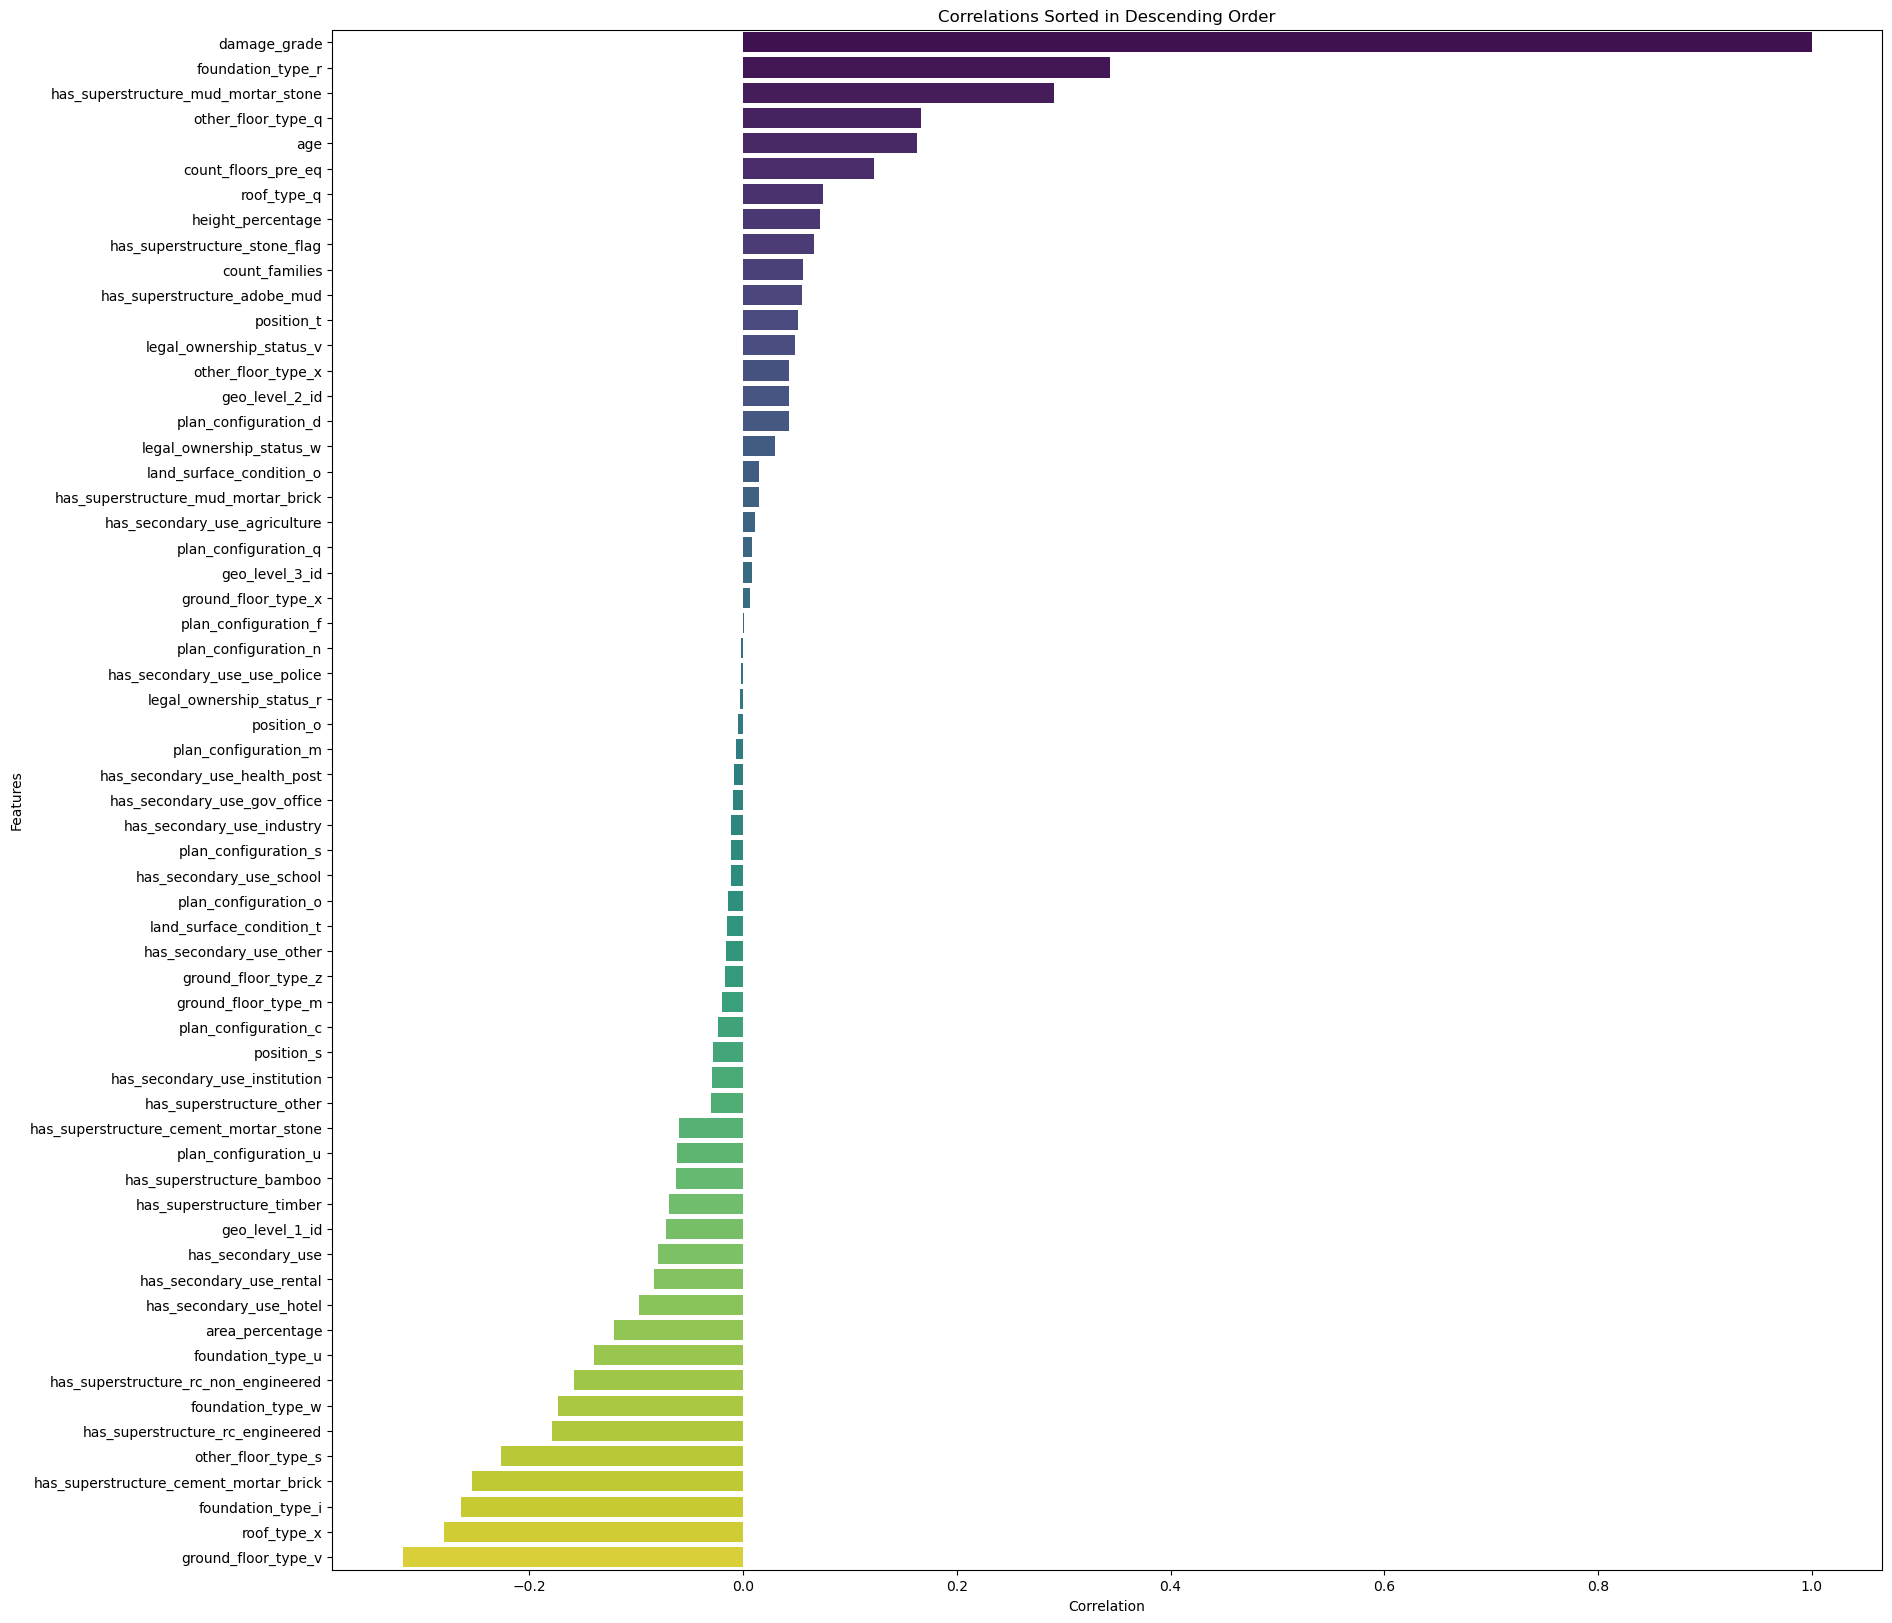

In [ ]:
sorted_correlations = correlations.sort_values(ascending=False)

# Set the figure size
plt.figure(figsize=(20,20))

# Create a bar plot
sns.barplot(x=sorted_correlations.values, y=sorted_correlations.index, palette="viridis")

# Set labels and title
plt.xlabel("Correlation")
plt.ylabel("Features")
plt.title("Correlations Sorted in Descending Order")

# Show the plot
plt.show()

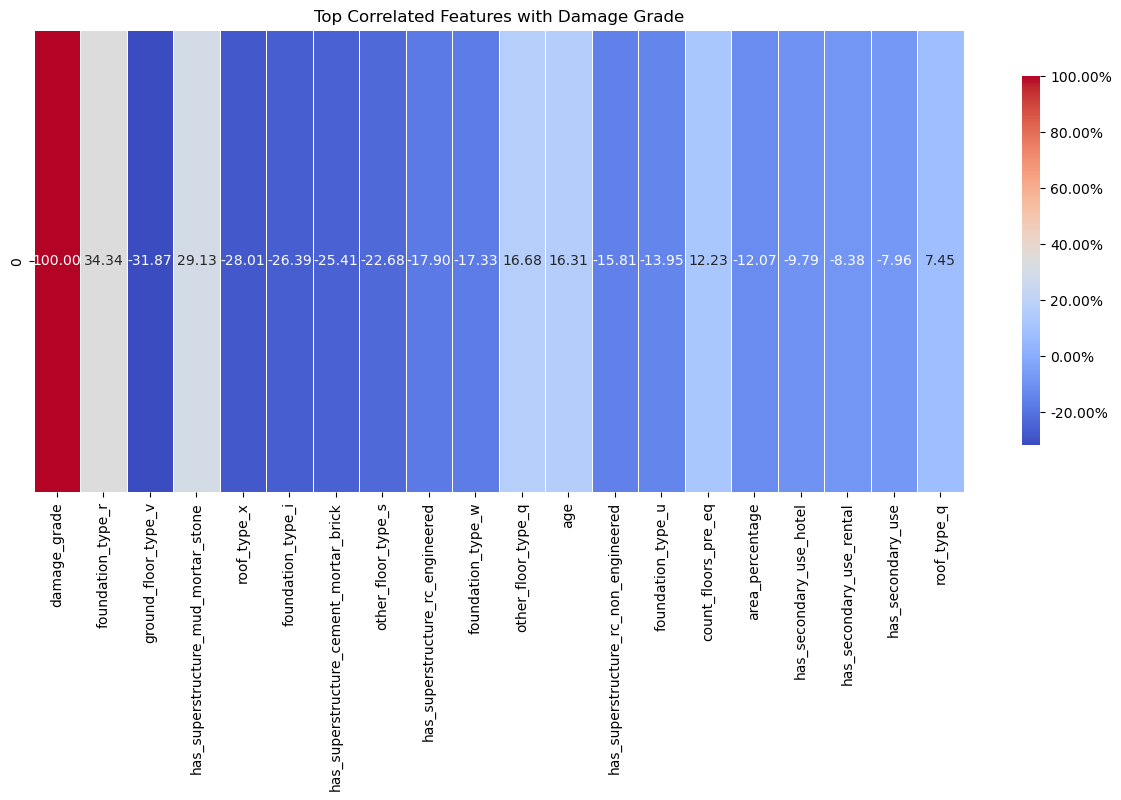

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.ticker import FuncFormatter


correlations = train_values_new.corrwith(train_labels["damage_grade"]) * 100


sorted_correlations = correlations.abs().sort_values(ascending=False)

top_n_features = sorted_correlations.head(20)


plt.figure(figsize=(15, 6))


sns.heatmap(pd.DataFrame(correlations[top_n_features.index]).transpose(),
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            linewidths=.5,
            cbar_kws={"shrink": 0.8, "format": FuncFormatter(lambda x, _: f"{x:.2f}%")}
            )


plt.title("Top Correlated Features with Damage Grade")

plt.show()

In [ ]:

train_values_new.drop(columns = ["damage_grade"], inplace=True)
test_values_new.drop(columns = ["damage_grade"], inplace=True)

In [ ]:
# !pip install scikit-learn

from sklearn.metrics import f1_score as score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import time
import warnings
warnings.filterwarnings("ignore")


In [ ]:
#Decision Tree
dt = DecisionTreeClassifier(max_features = None,
                            max_depth = 45,
                            min_samples_split = 3,
                            min_samples_leaf = 30,
                            random_state=42)
start_time = time.time()
model = dt.fit(train_values_new, train_labels)
dt_time_fit = time.time() - start_time

#Predictions - Decision Tree
start_time = time.time()
model.predict(test_values_new)
dt_time_pred = time.time() - start_time
print("Decision Tree")
print("Fit Time: {} seconds".format(dt_time_fit))
print("Prediction Time: {} seconds".format(dt_time_pred))
print("Training Score: {}".format(dt.score(train_values_new, train_labels)))
print("Test Score: {}".format(dt.score(test_values_new, test_labels)))
print("----------------------------------------")

Decision Tree
Fit Time: 2.713197946548462 seconds
Prediction Time: 0.04080486297607422 seconds
Training Score: 0.7494176921807668
Test Score: 0.6580789243449832
----------------------------------------


In [ ]:
# Decision Tree
dt = DecisionTreeClassifier(max_features = "sqrt",
                            max_depth = 45,
                            min_samples_split = 3,
                            min_samples_leaf = 30,
                            random_state=42)
start_time = time.time()
model = dt.fit(train_values_new, train_labels)
dt_time_fit = time.time() - start_time

#Predictions - Decision Tree
start_time = time.time()
model.predict(test_values_new)
dt_time_pred = time.time() - start_time
print("Decision Tree")
print("Fit Time: {} seconds".format(dt_time_fit))
print("Prediction Time: {} seconds".format(dt_time_pred))
print("Training Score: {}".format(dt.score(train_values_new, train_labels)))
print("Test Score: {}".format(dt.score(test_values_new, test_labels)))
print("----------------------------------------")


Decision Tree
Fit Time: 0.45714735984802246 seconds
Prediction Time: 0.031239748001098633 seconds
Training Score: 0.647157915740922
Test Score: 0.7398466639038541
----------------------------------------


In [ ]:
# Decision Tree
dt = DecisionTreeClassifier(max_features = "log2",
                            max_depth = 45,
                            min_samples_split = 2,
                            min_samples_leaf = 30,
                            random_state=42)
start_time = time.time()
model = dt.fit(train_values_new, train_labels)
dt_time_fit = time.time() - start_time

#Predictions - Decision Tree
start_time = time.time()
model.predict(test_values_new)
dt_time_pred = time.time() - start_time
print("Decision Tree")
print("Fit Time: {} seconds".format(dt_time_fit))
print("Prediction Time: {} seconds".format(dt_time_pred))
print("Training Score: {}".format(dt.score(train_values_new, train_labels)))

print("Test Score: {}".format(dt.score(test_values_new, test_labels)))
print("----------------------------------------")

Decision Tree
Fit Time: 0.328341007232666 seconds
Prediction Time: 0.03169512748718262 seconds
Training Score: 0.6185164293306625
Test Score: 0.7854560943040014
----------------------------------------


In [ ]:
#Random Forest
rf = RandomForestClassifier(max_features = None,
                            max_depth = 45,
                            min_samples_split = 3,
                            min_samples_leaf = 30,
                            random_state=42)
start_time = time.time()
model = rf.fit(train_values_new, train_labels)
rf_time_fit = time.time() - start_time

#Predictions - Random Forest
start_time = time.time()
model.predict(test_values_new)
rf_time_pred = time.time() - start_time
print("Random Forest")
print("Fit Time: {} seconds".format(rf_time_fit))
print("Prediction Time: {} seconds".format(rf_time_pred))
print("Training Score: {}".format(rf.score(train_values_new, train_labels)))
print("Test Score: {}".format(rf.score(test_values_new, test_labels)))
print("----------------------------------------")

Random Forest
Fit Time: 191.2251491546631 seconds
Prediction Time: 1.7184371948242188 seconds
Training Score: 0.7558336307228292
Test Score: 0.6798590965602984
----------------------------------------
